# 02 iRF for causal forest

In [1]:
import irf
from sklearn.datasets import load_boston, load_breast_cancer
from irf.ensemble import (RandomForestClassifierWithWeights,
                          RandomForestRegressorWithWeights)
import numpy as np
from irf import irf_jupyter_utils

In [2]:
X = np.random.normal(0,0.1,1000).reshape(100,10)
Z = np.zeros(100)
Z[:50] = 1
y = np.random.uniform(0, 1, (100,)) + X[:,0]
full_y = np.concatenate([Z.reshape(100,1), y.reshape(100,1)], axis = 1)

In [3]:
rf = RandomForestRegressorWithWeights(criterion='causal', max_depth=4, bootstrap=False,
                                      min_impurity_decrease=0)
rf.fit(X, full_y, feature_weight=np.ones((10,)))
rf.predict(X[:10])

array([[0.5       , 0.28889253],
       [0.87      , 0.02451289],
       [0.33333333, 0.63976592],
       [0.66666667, 0.03803454],
       [0.5       , 0.29410743],
       [0.75      , 0.31837088],
       [0.55263158, 0.44639623],
       [0.57142857, 0.66608893],
       [0.6       , 0.55090996],
       [0.33333333, 0.63976592]])

### Note that the prediction is just the average responses for samples in a node, so they are not very informative as of now.

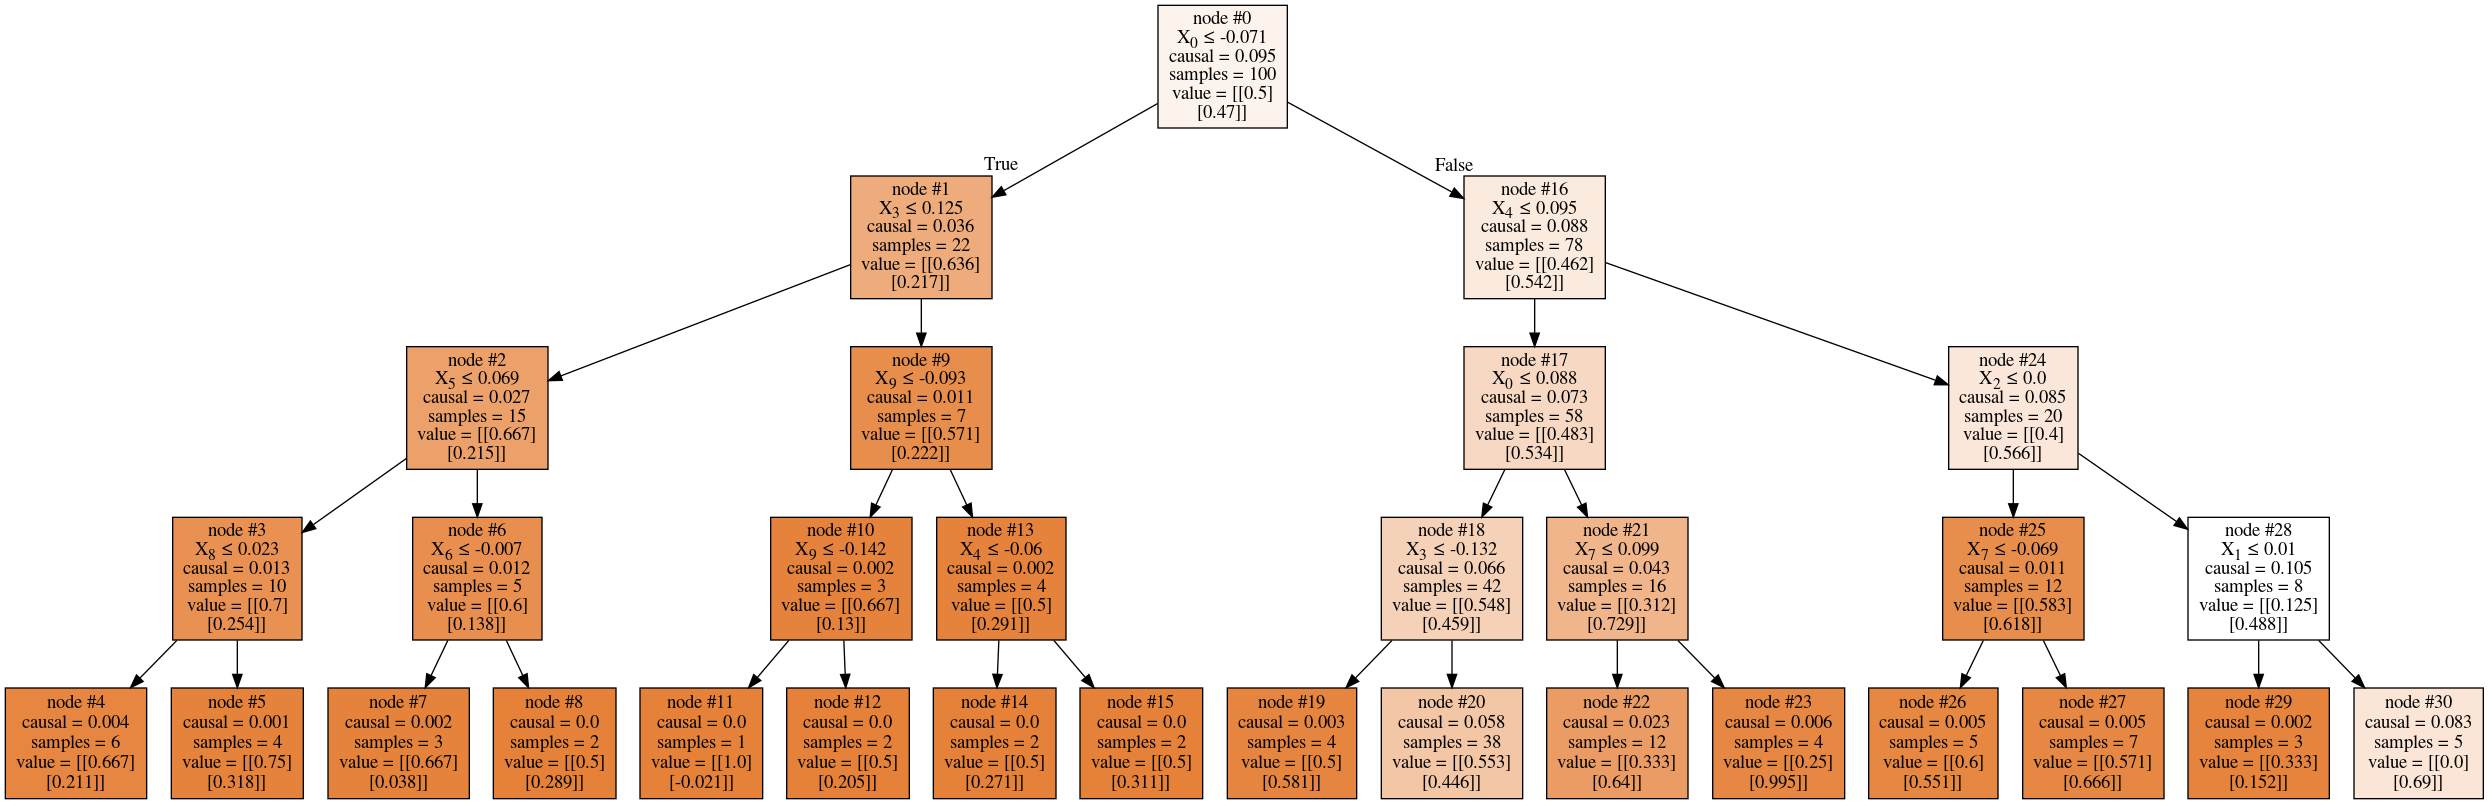

In [9]:
irf_jupyter_utils.draw_tree(decision_tree = rf.estimators_[0])